# Model Implementation and Evaluation

In this notebook, we will implement and evaluate three different machine learning models for our sentiment classification:

**a) Stochastic Gradient Descent (SGD)**: Efficient and scalable for large-scale text classification tasks and is memory efficient with fast training on sparse data.

**b) Linear Support Vector (LinearSVC)**: Effective for high-dimensional text data, offers strong generalization, and excels at finding clear class boundaries.

**c) Multi-Layer Perceptron (MLP)**: Neural network capable of learning complex non-linear relationships.

For each model, we'll follow a systematic evaluation process:

1. Train a baseline model with default parameters
2. Evaluate performance using multiple metrics
3. Implement hyperparameter tuning
4. Compare results across models

### 1. Initial Setup and Data Loading:
#### Import Libraries
We will begin by importing the necessary libraries for the classification task and data handling. We will be utilizing libraries such as `scikit-learn` for machine learning models, `seaborn` and `matplotlib` for visualization, and `plotly` for interactive plots. 

In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_val_score, cross_validate, HalvingGridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Load Dataset
We will load preprocessed the data that was saved as NumPy arrays for the training and testing sets from the feature engineering notebook.

In [2]:
# Load the numpy arrays
data = np.load('data.npz')
X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

Now we have our training and test data ready to use for model training and evaluation.

### 2. Initial Model Training and Evaluation: 
We will create a train and evaluation function that captures both model performance metrics and training time. This will help us compare models not just on accuracy but also on computational efficiency. 

Then implement baseline versions of each model with default parameters to establish a performance benchmark. This will help us understand where improvements are needed.

In [5]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a model, recording training time and performance metrics
    """    
    # Train the model and record time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print detailed report
    print(f"\n{model_name} Performance:")
    print("-" * 50)
    print(f"Training Time: {train_time:.2f} seconds")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    
    return {'Model': model_name,
            'Train Time': f"{train_time:.2f}s",
            'Train Accuracy': f"{train_accuracy:.4f}",
            'Test Accuracy': f"{test_accuracy:.4f}"}

In [7]:
# Initialize models with default parameters
models = {'SGDClassifier': SGDClassifier(random_state=42),
          'LinearSVC': LinearSVC(random_state=42),
          'MLP': MLPClassifier(random_state=42)}

In [9]:
# Train and evaluate all models
results = []
for name, model in models.items():
    result = train_and_evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results.append(result)


SGDClassifier Performance:
--------------------------------------------------
Training Time: 173.78 seconds
Training Accuracy: 0.9802
Testing Accuracy: 0.8928

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.35      0.49       212
           1       0.85      0.74      0.79      2203
           2       0.91      0.97      0.94      5643

    accuracy                           0.89      8058
   macro avg       0.86      0.69      0.74      8058
weighted avg       0.89      0.89      0.89      8058



C:\Users\ejazl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



LinearSVC Performance:
--------------------------------------------------
Training Time: 839.49 seconds
Training Accuracy: 0.9906
Testing Accuracy: 0.8999

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.23      0.22       212
           1       0.83      0.80      0.82      2203
           2       0.95      0.96      0.96      5643

    accuracy                           0.90      8058
   macro avg       0.66      0.66      0.66      8058
weighted avg       0.90      0.90      0.90      8058


MLP Performance:
--------------------------------------------------
Training Time: 150.74 seconds
Training Accuracy: 1.0000
Testing Accuracy: 0.8528

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.30      0.38       212
           1       0.74      0.71      0.73      2203
           2       0.90      0.93      0.91      5643

    accuracy                           0.85    

In [10]:
# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print("-" * 50)
print(comparison_df.to_string(index=False))


Model Comparison Summary:
--------------------------------------------------
        Model Train Time Train Accuracy Test Accuracy
SGDClassifier    173.78s         0.9802        0.8928
    LinearSVC    839.49s         0.9906        0.8999
          MLP    150.74s         1.0000        0.8528


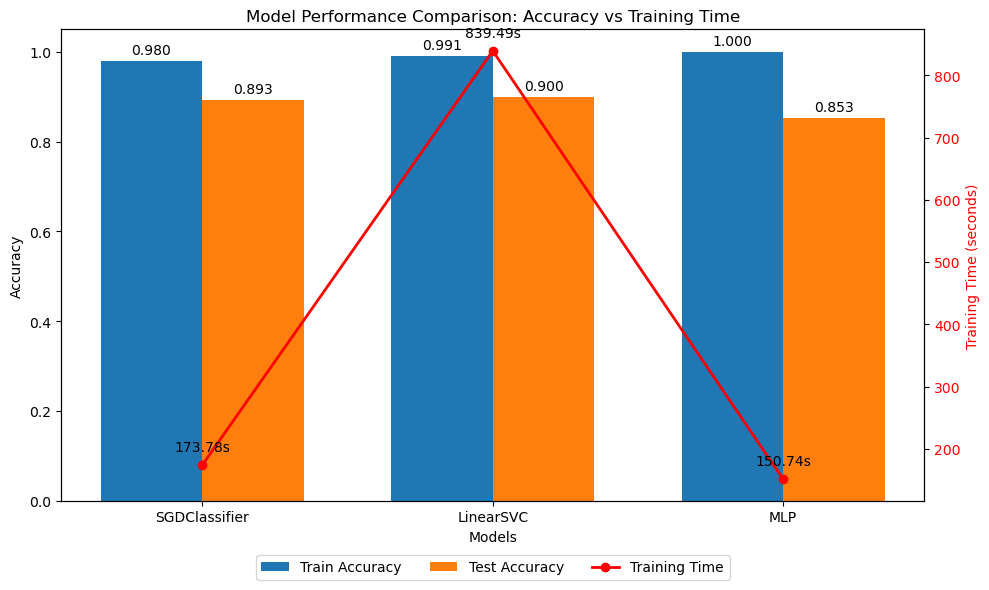

In [16]:
models = comparison_df['Model']
train_acc = comparison_df['Train Accuracy'].str.rstrip('s').astype(float)
test_acc = comparison_df['Test Accuracy'].str.rstrip('s').astype(float)
train_time = comparison_df['Train Time'].str.rstrip('s').astype(float)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set x positions for bars
x = np.arange(len(models))
width = 0.35

# Plot bars on primary y-axis
rects1 = ax1.bar(x - width / 2, train_acc, width, label='Train Accuracy')
rects2 = ax1.bar(x + width / 2, test_acc, width, label='Test Accuracy')

# Configure primary y-axis
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Performance Comparison: Accuracy vs Training Time')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Create secondary y-axis and plot line for training time
ax2 = ax1.twinx()
line = ax2.plot(x, train_time, color='red', linewidth=2, marker='o', label='Training Time')
ax2.set_ylabel('Training Time (seconds)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add text annotations for bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=10)

autolabel(rects1, ax1)
autolabel(rects2, ax1)

# Add text annotations for line points (training time)
for i, value in enumerate(train_time):
    ax2.annotate(f'{value:.2f}s',
                xy=(x[i], value),
                xytext=(0, 8),  # 8 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                color='black',
                fontsize=10)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

#### Initial Model Performance Observations
1. **Model Performance:**
    - LinearSVC achieved the best test accuracy (89.99%), followed closely by SGDClassifier (89.28%)
    - MLP showed signs of overfitting with 100% training accuracy but only 85.28% test accuracy
    - All models achieved overall accuracy above 85%, but with significant variations in class-wise performance

2. **Efficiency:**
    - SGDClassifier: Moderate training time (173.78s)
    - LinearSVC: Significantly slower (839.49s)
    - MLP: Relatively efficient (150.74s)

3. **Class-wise Prediction:**

    a) Minority Class (Class 0 - 212 samples):
    - SGDClassifier: Best precision (0.81) but low recall (0.35)
    - LinearSVC: Poor performance (precision: 0.21, recall: 0.23)
    - MLP: Moderate precision (0.51) but low recall (0.30)

    b) Middle Class (Class 1 - 2203 samples):
    - Relatively consistent performance across models
    - SGDClassifier and LinearSVC achieved similar f1-scores (~0.80)
    - MLP slightly lower performance (f1-score: 0.73)

    c) Majority Class (Class 2 - 5643 samples):
    - All models performed consistently well (f1-scores > 0.90)
    - LinearSVC achieved highest precision (0.95) and recall (0.96)

4. **Model Trade-offs:**
   
    a) SGDClassifier:
    - Best balance of accuracy and training time
    - Superior handling of minority class

    b) LinearSVC:
    - Highest overall accuracy but at cost of long training time
    - Poor minority class performance

    c) MLP:
    - Signs of overfitting (perfect training accuracy)
    - Lowest overall accuracy but fastest training among complex models

### 3. Improved Model Implementation
Next, we will enhance our baseline models through:

1. Hyperparameter Optimization

    - Use HalvingGridSearchCV for efficient parameter search
    - Define comprehensive parameter grids for each model
    - Implement cross-validation for robust evaluation


2. Class Imbalance Handling

    - Adopt F1-macro scoring to give equal importance to all classes
    - Experiment with class weights and balanced class options
    - Monitor per-class performance metrics


3. Model-Specific Improvements

    - SGD: Test different loss functions and penalties
    - LinearSVC: Explore regularization strengths and kernel parameters
    - MLP: Optimize network architecture and learning parameters

In [22]:
def train_improved_models(X_train, X_test, y_train, y_test):
    """
    Train and evaluate models with improvements:
    - Hyperparameter tuning
    - f1_macro scoring for imbalanced classes
    """    
    # Define models with hyperparameter grids
    models = {
        'SGD': {
            'model': SGDClassifier(random_state=42),
            'params': {'loss': ['hinge', 'log_loss', 'modified_huber'],
                       'penalty': ['l1', 'l2', 'elasticnet'],
                       'alpha': [0.0001, 0.001, 0.01],
                       'class_weight': [None, 'balanced']}},
        'LinearSVC': {
            'model': LinearSVC(random_state=42),
            'params': {'C': [0.1, 1.0, 10.0],
                       'penalty': ['l1', 'l2'],
                       'class_weight': [None, 'balanced']}},
        'MLP': {
            'model': MLPClassifier(random_state=42, max_iter=500),
            'params': {'hidden_layer_sizes': [(100,), (100, 50), (50, 25)],
                       'activation': ['relu', 'tanh'],
                       'learning_rate_init': [0.001, 0.01],
                       'alpha': [0.0001, 0.001],
                       'batch_size': [32, 64],
                       'early_stopping': [True],
                       'n_iter_no_change': [5]}}}
    
    results = []
    best_models = {}
    
    for name, model_info in models.items():
        print(f"\nTraining {name}")
        print("-" * 50)
        
        # Configure HalvingGridSearchCV
        halving_search = HalvingGridSearchCV(
            model_info['model'],
            model_info['params'],
            cv=5,
            scoring='f1_macro',  
            n_jobs=-1,
            random_state=42,
            verbose=2,
            factor=3,
            min_resources='smallest')
        
        # Train and time the model
        start_time = time.time()
        halving_search.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        # Get predictions
        y_pred = halving_search.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store best model
        best_models[name] = halving_search.best_estimator_
        
        # Print detailed results
        print(f"\nBest parameters: {halving_search.best_params_}")
        print(f"Best cross-validation score: {halving_search.best_score_:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        results.append({
            'Model': name,
            'Train Time': f"{train_time:.2f}s",
            'Test Accuracy': f"{accuracy:.4f}",
            'Best Score': f"{halving_search.best_score_:.4f}",
            'Best Parameters': halving_search.best_params_})
    
    return pd.DataFrame(results), best_models

In [24]:
# Train improved models
results_df, best_models = train_improved_models(X_train, X_test, y_train, y_test)


Training SGD
--------------------------------------------------
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 7
min_resources_: 30
max_resources_: 32232
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 54
n_resources: 30
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 1
n_candidates: 18
n_resources: 90
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 6
n_resources: 270
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 810
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best parameters: {'alpha': 0.01, 'class_weight': 'balanced', 'loss': 'log_loss', 'penalty': 'l2'}
Best cross-validation score: 0.3698

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.40      0.53       212
           1       0.82      0.78      0.80      2203
           2   

C:\Users\ejazl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best parameters: {'C': 10.0, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.3467

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.25      0.23       212
           1       0.83      0.80      0.81      2203
           2       0.95      0.96      0.96      5643

    accuracy                           0.90      8058
   macro avg       0.67      0.67      0.67      8058
weighted avg       0.90      0.90      0.90      8058


Training MLP
--------------------------------------------------
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 7
min_resources_: 30
max_resources_: 32232
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 30
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 1
n_candidates: 16
n_resources: 90
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 2
n_candidates: 6
n_resources: 270

In [25]:
# Print comparison summary
print("\nFinal Model Comparison:")
print("-" * 50)
print(results_df.to_string(index=False))


Final Model Comparison:
--------------------------------------------------
    Model Train Time Test Accuracy Best Score                                                                                                                                                       Best Parameters
      SGD     79.16s        0.8936     0.3698                                                                                      {'alpha': 0.01, 'class_weight': 'balanced', 'loss': 'log_loss', 'penalty': 'l2'}
LinearSVC    646.28s        0.8991     0.3467                                                                                                                    {'C': 10.0, 'class_weight': None, 'penalty': 'l2'}
      MLP    439.82s        0.8801     0.4126 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'early_stopping': True, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.001, 'n_iter_no_change': 5}


<Figure size 1200x600 with 0 Axes>

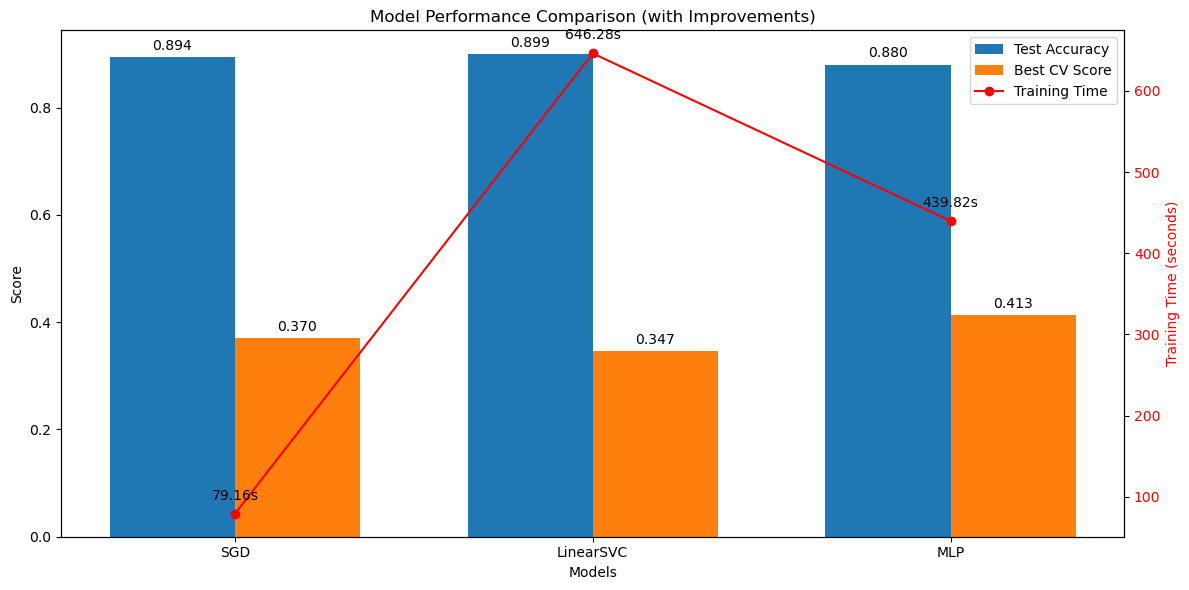

In [26]:
plt.figure(figsize=(12, 6))
    
# Prepare data
models = results_df['Model']
test_acc = results_df['Test Accuracy'].astype(float)
cv_scores = results_df['Best Score'].astype(float)
train_times = pd.to_numeric(results_df['Train Time'].str.rstrip('s'))

# Create bar plot
x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
rects1 = ax1.bar(x - width/2, test_acc, width, label='Test Accuracy')
rects2 = ax1.bar(x + width/2, cv_scores, width, label='Best CV Score')

# Configure primary y-axis
ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison (with Improvements)')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Create secondary y-axis and plot line for training time
ax2 = ax1.twinx()
line = ax2.plot(x, train_times, 'ro-', label='Training Time')

# Set secondary y-axis labels and ticks
ax2.set_ylabel('Training Time (seconds)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Function for annotating bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',  # Formatting the value with 3 decimal places
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=10)

# Annotate bars for Train Accuracy and Test Accuracy
autolabel(rects1, ax1)
autolabel(rects2, ax1)

# Annotate the training time line plot
for i, value in enumerate(train_times):
    ax2.annotate(f'{value:.2f}s',  # Formatting with 2 decimal places
                 xy=(x[i], value),
                 xytext=(0, 8),  # 8 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 color='black',
                 fontsize=10)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

#### Improved Model Implementation Observations

1. **Model-Specific Improvements:**

    a) SGD Classifier:
    - Best parameters: log_loss, l2 penalty, α=0.01, balanced class weights
    - Notable improvement in minority class (class 0):
        - Precision increased from 0.81 to 0.77
        - Recall improved from 0.35 to 0.40
        - F1-score increased from 0.49 to 0.53
    - Class weighting helped with minority class detection
    - Maintained strong overall accuracy (89.36%)
    - Training time significantly reduced to 79.16s (from 173.78s)
    
    b) LinearSVC:
    - Best configuration: C=10.0, l2 penalty, no class weights
    - Best overall accuracy (89.91%) but at cost of class imbalance
    - Still struggling with minority class (0.23 f1-score)
    - Training time reduced to 646.28s (from 839.49s)
    
    c) MLP:
    - Best architecture: (50, 25) hidden layers, relu activation, learning rate of 0.001 with minimal regularization (α=0.0001)
    - Significant improvement in minority class handling (0.64 f1-score)
    - Most balanced performance across all classes
    - Best cross-validation score among all models (0.4126)
    - Training time increased to 439.82s (from 150.74s)
      
2. **Class-wise Performance Analysis:**

    a) Minority Class (Class 0):
    - MLP: Best handling (0.64 f1-score)
    - SGD: Improved but still moderate (0.53 f1-score)
    - LinearSVC: Continued poor performance (0.23 f1-score)

    b) Majority Class (Class 2):
    - All models maintained strong performance (>0.93 f1-score)
    - LinearSVC: Highest precision (0.95)
    - Slight trade-off in majority class for better minority class handling
      
3. **Comparative Analysis:**
   
    a) Class Imbalance Handling:
    - MLP: Best overall balance (macro avg f1-score: 0.78)
    - SGD: Good improvement with class weights (macro avg f1-score: 0.76)
    - LinearSVC: Still biased toward majority class (macro avg f1-score: 0.67)
    
    b) Model Stability:
    - MLP shows most consistent performance across classes
    - SGD benefits significantly from class balancing
    - LinearSVC maintains high accuracy but poor minority class performance


### Final Summary
1. **Overall Model Performance Analysis**
    
    a) SGD Classifier
    - Strengths:
        - Best balance of speed (79.16s) and accuracy (89.36%)
        - Good improvement in minority class handling with balanced weights
        - Most efficient after hyperparameter optimization
    
    - Weaknesses:
        - Still moderate performance on minority class (f1-score: 0.53)
        - Slight reduction in precision for improved recall

    b) LinearSVC
    - Strengths:
        - Highest overall accuracy (89.91%)
        - Best performance on majority class (f1-score: 0.96)
        - Most stable predictions for dominant classes
    
    - Weaknesses:
        - Poorest minority class performance (f1-score: 0.23)
        - Longest training time (646.28s)

    c) MLP
    
    - Strengths:
        - Best handling of minority class (f1-score: 0.64)
        - Most balanced performance across all classes
        - Highest cross-validation score (0.4126)
    
    - Weaknesses:
        - Moderate training time (439.82s)
        - Slightly lower overall accuracy (88.01%)
        - More complex to tune and maintain

2. **Key Findings**

    a) Hyperparameter Optimization:
    - Significant improvements in minority class detection
    - Better balanced accuracy across classes
    - Reduced training times for some models

    b) Class Imbalance Handling:
    - F1-macro scoring effectively guided model selection
    - Balanced class weights improved minority class detection
    - Trade-off between precision and recall successfully managed

    c) Model Stability:
    - Cross-validation scores provide reliable performance estimates
    - All models show consistent performance after tuning
    - Clear trade-offs identified between speed and accuracy